<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Ad_hoc_projects/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
#https://www.datacamp.com/community/tutorials/recommender-systems-python

In [35]:
#Import the three datasets
movies_df=pd.read_csv("https://raw.githubusercontent.com/Santanukolkata/Data_Science/master/datasets/movies.dat",delimiter="::",engine='python',names =['MovieID','Title','Genres'],header=None, encoding = "ISO-8859-1")
users_df=pd.read_csv("https://raw.githubusercontent.com/Santanukolkata/Data_Science/master/datasets/users.dat",delimiter="::",engine='python',names =['UserID','Gender','Age','Occupation','Zip-code'],header=None, encoding = "ISO-8859-1")
rating_df=pd.read_csv("https://raw.githubusercontent.com/Santanukolkata/Data_Science/master/datasets/ratings.dat",delimiter="::",engine='python',names =['UserID','MovieID','Rating','Timestamp'],header=None, encoding = "ISO-8859-1")

In [36]:
print(movies_df.shape,users_df.shape,rating_df.shape)

(3883, 3) (6040, 5) (1000209, 4)


In [37]:
movies_df =movies_df.head(10).copy()

**Content-Based Recommender**

In [38]:
def remove_year(val):
    return val[0: val.find('(')-1]
def splitting_gen(val):
    return ' ' +' '.join([str(elem) for elem in val.split('|')])

movies_df['Search_Criteria']=movies_df['Title'].apply(remove_year)
movies_df['Search_Criteria'] =movies_df['Search_Criteria'] + movies_df['Genres'].apply(splitting_gen)
movies_df.head(10)


,MovieID,Title,Genres,Search_Criteria
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story Animation Children's Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II Comedy
5,6,Heat (1995),Action|Crime|Thriller,Heat Action Crime Thriller
6,7,Sabrina (1995),Comedy|Romance,Sabrina Comedy Romance
7,8,Tom and Huck (1995),Adventure|Children's,Tom and Huck Adventure Children's
8,9,Sudden Death (1995),Action,Sudden Death Action
9,10,GoldenEye (1995),Action|Adventure|Thriller,GoldenEye Action Adventure Thriller


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['Search_Criteria'])

In [40]:
tfidf_matrix.toarray()[0]

array([0.        , 0.        , 0.50599637, 0.        , 0.37632442,
       0.3004712 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.50599637, 0.        , 0.        ,
       0.        , 0.50599637, 0.        ])

In [24]:
tfidf.get_feature_names()

['action',
 'adventure',
 'animation',
 'bride',
 'children',
 'comedy',
 'crime',
 'death',
 'drama',
 'exhale',
 'fantasy',
 'father',
 'goldeneye',
 'grumpier',
 'heat',
 'huck',
 'ii',
 'jumanji',
 'men',
 'old',
 'romance',
 'sabrina',
 'story',
 'sudden',
 'thriller',
 'tom',
 'toy',
 'waiting']

In [41]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [35]:
len(movies_df['Title'].unique())

3883

In [36]:
indices = pd.Series(movies_df.index, index=movies_df['Title']).drop_duplicates()

In [37]:
indices[:10]

Title
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
Heat (1995)                           5
Sabrina (1995)                        6
Tom and Huck (1995)                   7
Sudden Death (1995)                   8
GoldenEye (1995)                      9
dtype: int64

In [77]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    #idx = indices[title]
    #print(idx)
    idx=0
    try:
        idx = indices[title]
        print('Searching for D: '+ title)
    except:
        for index, value in movies_df['Title'].items():
            if value.lower().find(title) == 0:
                idx=index
                print('Searching for P: '+ value)
                break

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    #print(sim_scores)
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:8]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return movies_df['Title'].iloc[movie_indices]

In [78]:
get_recommendations('ki')

Searching for P: Kids of the Round Table (1995)


173                             Kids (1995)
1985        Honey, I Shrunk the Kids (1989)
2380    Garbage Pail Kids Movie, The (1987)
1                            Jumanji (1995)
1898                       Labyrinth (1986)
1936                    Goonies, The (1985)
1779                  Borrowers, The (1997)
Name: Title, dtype: object

Working with users data:

In [42]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [46]:
#user data fix
users_df[(users_df['Age'] < 2)  & (users_df['Gender']=='M')]=users_df[(users_df['Age'] > 2)  & (users_df['Gender']=='M') ]['Age'].mean()
users_df[(users_df['Age'] < 2)  & (users_df['Gender']=='F')]=users_df[(users_df['Age'] > 2)  & (users_df['Gender']=='F') ]['Age'].mean()


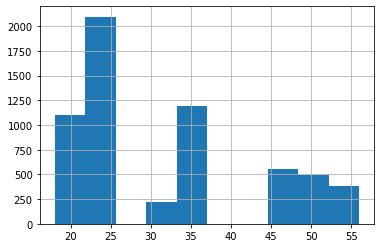

In [47]:
users_df['Age'].hist()

In [48]:
rating_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [79]:
m = rating_df.groupby(by=['MovieID']).count()[['UserID']].quantile(0.50)
c = rating_df['Rating'].mean()
print(m,c)




rating_new = rating_df.groupby('MovieID').agg({'UserID': ['count'],'Rating': ['mean']})

UserID    123.5
Name: 0.5, dtype: float64 3.581564453029317


In [81]:
rating_new.columns = [ 'Vote_count', 'Ratings']
rating_new =rating_new.reset_index()

In [ ]:
rating_df[rating_df['UserID']==1].shape

(53, 4)

In [ ]:
for items in movies_df['Title'][0:10].values:
    print(items)

Toy Story (1995)
Jumanji (1995)
Grumpier Old Men (1995)
Waiting to Exhale (1995)
Father of the Bride Part II (1995)
Heat (1995)
Sabrina (1995)
Tom and Huck (1995)
Sudden Death (1995)
GoldenEye (1995)


In [ ]:
#movie_distance=movies_df[['Title']].find()

def getting_year(val):
    return val[val.find('(')+1:val.find(')')]

movies_df['Year']=movies_df['Title'].apply(getting_year)

In [ ]:
Movie_ratings =rating_df.groupby(['MovieID']).mean()[['Rating']].reset_index()
Movie_ratings.head()

,MovieID,Rating
0,1,4.146846
1,2,3.201141
2,3,3.016736
3,4,2.729412
4,5,3.006757


In [ ]:
users_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [ ]:
users_df['Gender'].value_counts()

M    4331
F    1709
Name: Gender, dtype: int64

In [ ]:
users_df['Occupation'].value_counts()

In [ ]:
users_df['Age'].hist()